# Libraries Necessary 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scipy as sp
import math
import random
from scipy.optimize import curve_fit,minimize
from numpy.linalg import inv
from tqdm import tqdm as tqdm

In [22]:
#This creates a dataframe for each channel

def create_stringA(location):
#     path0 = '/home/drew/He6CRES/Neon-19/Data/SampleData_Michael/CH0@DT5725_1146_Data_{0:s}.csv'.format(location)
#     path2 = '/home/drew/He6CRES/Neon-19/Data/SampleData_Michael/CH2@DT5725_1146_Data_{0:s}.csv'.format(location)
    
    path0 = '/home/drew/He6CRES/Neon-19/Data/Ne19Run_09182020/CH0@DT5725_1146_Data_{0:s}.csv'.format(location)
    path2 = '/home/drew/He6CRES/Neon-19/Data/Ne19Run_09182020/CH2@DT5725_1146_Data_{0:s}.csv'.format(location)
    
    path = [path0,path2]
    return path

#def create_string(location):
    #path0 = '/home/cenpa/Ne19/DAQ/FinalConfigSettings/DAQ/{0:s}/UNFILTERED/CH0@DT5725_1146_Data_{0:s}.csv'.format(location)
    #path2 = '/home/cenpa/Ne19/DAQ/FinalConfigSettings/DAQ/{0:s}/UNFILTERED/CH2@DT5725_1146_Data_{0:s}.csv'.format(location)
    
    #path = [path0,path2]
    #return path



#write the folder location where 'BiTest-03' is
run_name = 'Ne19rundeltaE-02-22-20_5'


#ch0_df = pd.read_csv(path[0],sep=';')
#ch1_df = pd.read_csv(path[1],sep=';')

def Run_DataA(run_folder_name):
    return[pd.read_csv(create_stringA(run_name)[i],sep=';') for i in range(2)]

# Summary of September 2020 Production Run 


* ELOG Summary of Runs: https://maxwell.npl.washington.edu/elog/CENPA/Ne-19/8

**General Info for Runs:**

* Date: 09/18/2020
* Runs are named: runTEST09182020_#
* CH0: Ne19 Events, CH2: Cycle Start signal, when accum is open and rough valve is closed. CH2 corresponds to 0-001 in clycle. 
* Beam cycle interval means the interval the beam is OFF.
* Note by DWS:  I believe in the below, "Accum: 053-0395" means the valve is SHUT for that  time (this is the plan, and the plots look like it is working that way). Likewise "Rough 001-054" means the valve is SHUT.  So accumulation occurs during the 0-53 sec part of the cycle.Roughing for the pump for 054-end, and for the accum chamber for 395 to end when cycled, the beam is OFF during the "beam"  part of the cycle, as noted by Drew. 

**General Info for this Document:**

* Plots all have 1 second bins. 
* Orange vertical lines represent the trigger from ch2. 

# Run Descriptions: 

## Run Parameters for Runs 0-6: 

* Beam @ 310 nA (slowly came down to 220 nA throughout the runs)
* Gas Flow: 1.1
* Gas Pressure: 30 PSIG

## Run 0/1: 

* runTEST09182020_0/1: Beam continuously on. Testing to see if everything works.

Max Rate of Run 0:  37.523  kHz
Max Rate of Run 1:  35.805  kHz


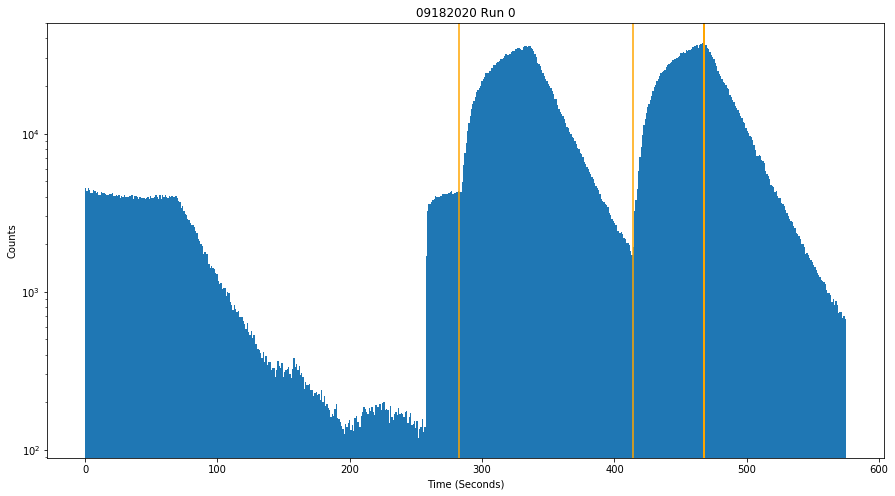

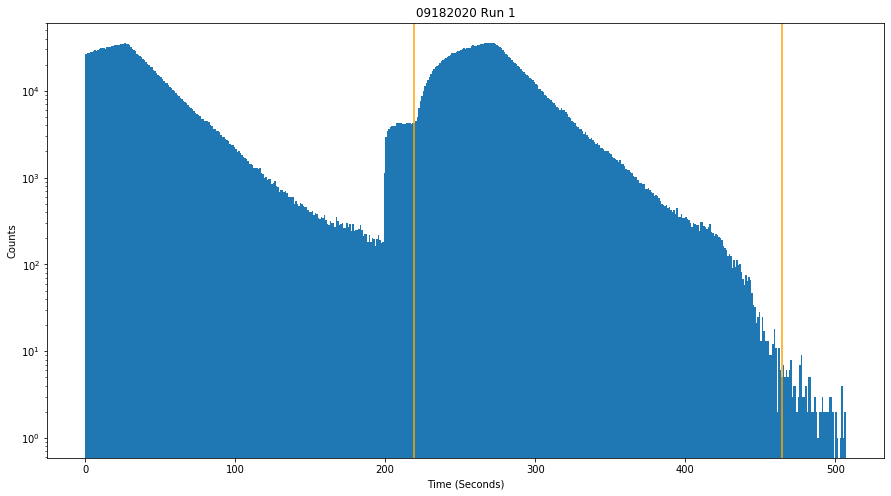

In [4]:
for i in range(2):    
    run_name = 'runTEST09182020_{}'.format(i)
    data = Run_Data(run_name)
    BinNum = int(data[0]['TIMETAG'].max()*10**-12) # Setting the number of bins = time of run in seconds. 
    plt.figure(figsize=(15,8))
    plt.tight_layout()
    plt.title('09182020 Run {}'.format(i))
    plt.ylabel('Counts')
    plt.xlabel('Time (Seconds)')
    plt.yscale('log')
    xcoords = data[1]['TIMETAG']*10**-12
    for xc in xcoords:
        plt.axvline(x=xc,color='orange')
    y, x, _ = plt.hist(data[0]['TIMETAG']*10**-12,bins=BinNum);
    print("Max Rate of Run {}: ".format(i), y.max()*10**-3," kHz")

**Take-Aways:**

* Understanding the shoulder (between 200-300s in Run 1): The decay cell opens to the roughing pump (accum open, rough open) at ~200s and the Ne-19 pressure in the decay cell rises to the equilibrium pressure in the chamber which is higher than the pressure in the decay cell right before opening because Ne-19 is being produced continuously. Then at ~250s the valve to the roughing pump closes (accum open, rough closed) and the decay volume fills with Ne-19. Then at 300s the accum valve closed and exponential decay begins. 
* Max Rate of Run 0:  37.523  kHz
* Max Rate of Run 1:  35.805  kHz

## Run 2: 

* runTEST09182020_2: Beam continuously on. A long cycle in order to look at background with the beam on. Accumulation for 340s (20 halflives)

Max Rate of Run 2:  37.743  kHz


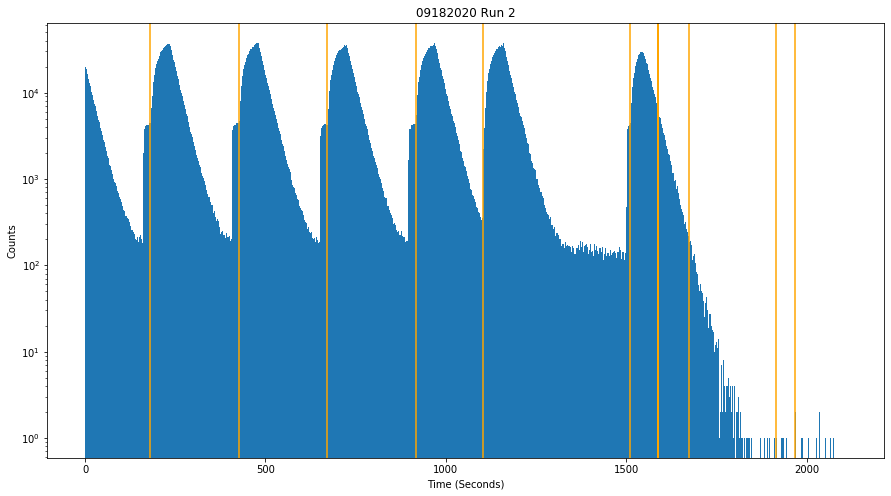

In [5]:
i = 2
run_name = 'runTEST09182020_{}'.format(i)
data = Run_Data(run_name)
BinNum = int(data[0]['TIMETAG'].max()*10**-12) # Setting the number of bins = time of run in seconds.

plt.figure(figsize=(15,8))
plt.tight_layout()
plt.title('09182020 Run {}'.format(i))
plt.ylabel('Counts')
plt.xlabel('Time (Seconds)')
plt.yscale('log')
xcoords = data[1]['TIMETAG']*10**-12
for xc in xcoords:
    plt.axvline(x=xc,color='orange')
y, x, _ = plt.hist(data[0]['TIMETAG']*10**-12,bins=BinNum);
print("Max Rate of Run {}: ".format(i), y.max()*10**-3," kHz")

**Take-Aways:**

*  With the beam on you do start to see more counts (deviation from linearity) towards the end of the runs. Background with beam on ~180 Hz.
* Max Rate of Run 2:  37.743  kHz

## Run 3: 

* runTEST09182020_3: Testing the background. Beam is on continuously. The accumulator valve is closed and the rest is cycling as normal. Cycle Length: 405 Beam: ON Accum: 053- 0395  Rough: 001 - 054

Max Rate of Run 3:  0.466  kHz
Average Background with Beam ON: 137.46666666666667 Hz


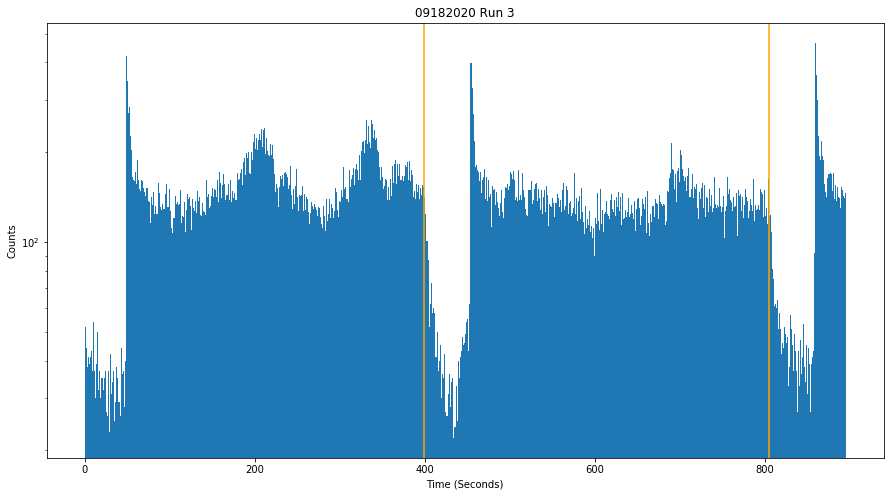

In [6]:
i = 3
run_name = 'runTEST09182020_{}'.format(i)
data = Run_Data(run_name)
BinNum = int(data[0]['TIMETAG'].max()*10**-12) # Setting the number of bins = time of run in seconds.

plt.figure(figsize=(15,8))
plt.tight_layout()
plt.title('09182020 Run {}'.format(i))
plt.ylabel('Counts')
plt.xlabel('Time (Seconds)')
plt.yscale('log')
xcoords = data[1]['TIMETAG']*10**-12
for xc in xcoords:
    plt.axvline(x=xc,color='orange')
y, x, _ = plt.hist(data[0]['TIMETAG']*10**-12,bins=BinNum);
print("Max Rate of Run {}: ".format(i), y.max()*10**-3," kHz")
print("Average Background with Beam ON:", y[500:800].mean(), "Hz")

**Take-Aways:**

* Max Rate of Run 3:  0.466  kHz. This seems to occur right as roughing valve opened after being closed from 0-54s. 
    * This led (get it?) us to protect the detector with a lead shield. Good idea Heather! 
* Average Background with Beam ON: 137.46666666666667 Hz (between 500-800s)
* Understanding the spikes and dips: This background is primarily coming from decays within the SS tube between the roughing valve and the roughing pump. When the roughing pump closes the rate dips (at trigger, t=0). Then when it opens there is a higher pressure of Ne-19 that exits the pump causing the spike.  

## Run 4: 

* runTEST09182020_4: Testing the background with a lead gaurd on the roughing side of the scintilator panels. Lead went on at 180s. Running beam continuously. The accumulator valve is closed and the rest is cycling as normal. Cycle Length: 405 Beam: ON Accum: 053- 0395,  Rough: 001 - 054. There are spikes in the background that now seem to be uncorrelated with the valve cycling. 

Max Rate of Run 4:  0.508  kHz
Average Background with Beam ON, Lead Shielding: 24.585 Hz


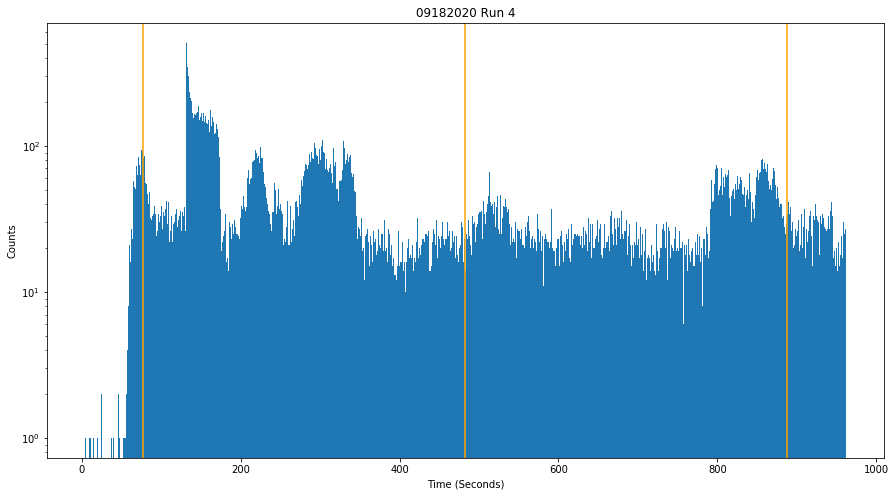

In [7]:
i = 4
run_name = 'runTEST09182020_{}'.format(i)
data = Run_Data(run_name)
BinNum = int(data[0]['TIMETAG'].max()*10**-12) # Setting the number of bins = time of run in seconds.

plt.figure(figsize=(15,8))
plt.tight_layout()
plt.title('09182020 Run {}'.format(i))
plt.ylabel('Counts')
plt.xlabel('Time (Seconds)')
plt.yscale('log')
xcoords = data[1]['TIMETAG']*10**-12
for xc in xcoords:
    plt.axvline(x=xc,color='orange')
y, x, _ = plt.hist(data[0]['TIMETAG']*10**-12,bins=BinNum);
print("Max Rate of Run {}: ".format(i), y.max()*10**-3," kHz")
print("Average Background with Beam ON, Lead Shielding:", y[400:800].mean(), "Hz")

**Take-Aways:**

* Average Background with Beam ON, Lead Shielding: 24.585 Hz
* The lead shielding greatly reduces background when the beam is on. There is no longer a spike observed when the roughing pump is opened. 
* There is still variability in the background that seems to be uncorrelated to our cycle structure. Perhaps production variability. See ~800s in Run 4 plot.

## Run 5: 

* runTEST09182020_5: Testing the background. Lead shielding now in place permanently. Beam is now cycled as it would be in half-life measurement mode meaning beam is off during Beam interval. Cycle Length: 415 Beam: 053-385 Accum: 053- 0395  Rough: 001 - 054. From beam off to ~0 count background is on order of 50-80s.  

Max Rate of Run 5:  0.046  kHz


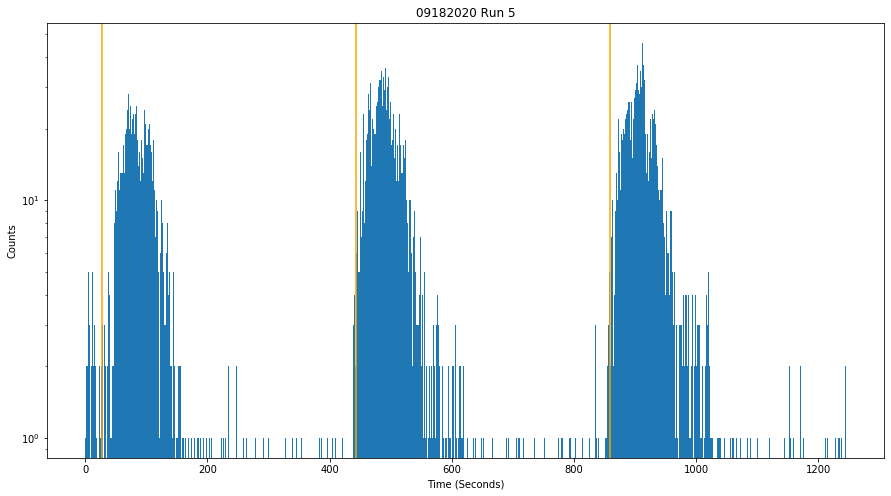

In [8]:
i = 5
run_name = 'runTEST09182020_{}'.format(i)
data = Run_Data(run_name)
BinNum = int(data[0]['TIMETAG'].max()*10**-12) # Setting the number of bins = time of run in seconds.

plt.figure(figsize=(15,8))
plt.tight_layout()
plt.title('09182020 Run {}'.format(i))
plt.ylabel('Counts')
plt.xlabel('Time (Seconds)')
plt.yscale('log')
xcoords = data[1]['TIMETAG']*10**-12
for xc in xcoords:
    plt.axvline(x=xc,color='orange')
y, x, _ = plt.hist(data[0]['TIMETAG']*10**-12,bins=BinNum);
print("Max Rate of Run {}: ".format(i), y.max()*10**-3," kHz")

**Take-Aways:**

* From beam off to ~0 count background is on order of 50-80s.
    * How should we deal with this background? If the beam goes off when the accum valve closes (t = 53s) then we have a time dependent background. Though this will potentially not matter much. At it's worst it's a $ 10^{-3}$ effect: 35Hz/ 35kHz ~ $ 10^{-3}$.
* Could we average over many of these cycles and then subtract that from our high quality half-life data. The issue here seems to be the repeatability of the production run parameters. 

## Run 6: 

* runTEST09182020_6: Testing the background. Beam is ON. The rest is cycled as in "_5". But now SF6/Ne19 needle valve is CLOSED. No Ne19 is flowing into the 8" beam valve.  (DWS: actually the valve from the target into the manifold, V4.  You can't close the needle valve tight).

Fraction of non-zero bins: 0.3236842105263158
Mean counts for non-zero bins: 1.3170731707317074
Total Background Rate 0.4263157894736842  Hz


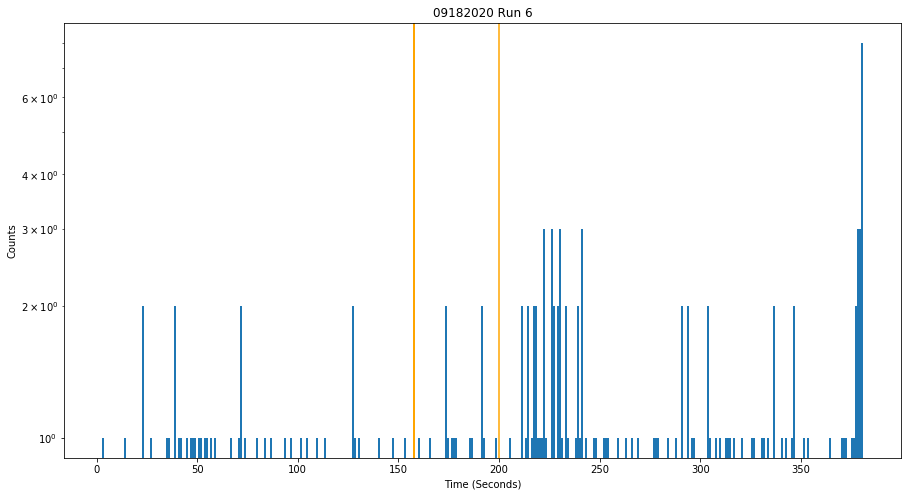

In [9]:
i = 6
run_name = 'runTEST09182020_{}'.format(i)
data = Run_Data(run_name)
BinNum = int(data[0]['TIMETAG'].max()*10**-12) # Setting the number of bins = time of run in seconds.

plt.figure(figsize=(15,8))
plt.tight_layout()
plt.title('09182020 Run {}'.format(i))
plt.ylabel('Counts')
plt.xlabel('Time (Seconds)')
plt.yscale('log')
xcoords = data[1]['TIMETAG']*10**-12
for xc in xcoords:
    plt.axvline(x=xc,color='orange')
y, x, _ = plt.hist(data[0]['TIMETAG']*10**-12,bins=BinNum);
print("Fraction of non-zero bins:", np.shape(np.nonzero(y))[1]/np.shape(y)[0])
print("Mean counts for non-zero bins:", y[np.argwhere(y!=0)].mean())
print("Total Background Rate",y.mean()," Hz")

**Take-Aways:**

* Our background is very small when the gas is not flowing. The beam-specific backgrounds are very small.
* Fraction of non-zero bins: 0.3236842105263158
* Mean counts for non-zero bins: 1.3170731707317074
* Total Background Rate 0.4263157894736842  Hz 

## For Run 7,9 we investigated the relationship between production parameters and max rates.

For both 7,9:
* Cycle Length: 124, Beam: ON,  Accum: 053- 104,  Rough: 001 - 054.
* Beam ON continuously.

## Run 7: 

Run Parameters: 

* Beam @ 220 nA
* Gas Flow: .9
* Gas Pressure: 30 PSIG

**Max Rate of Run 7:  25.482  kHz**

Max Rate of Run 7:  25.482  kHz


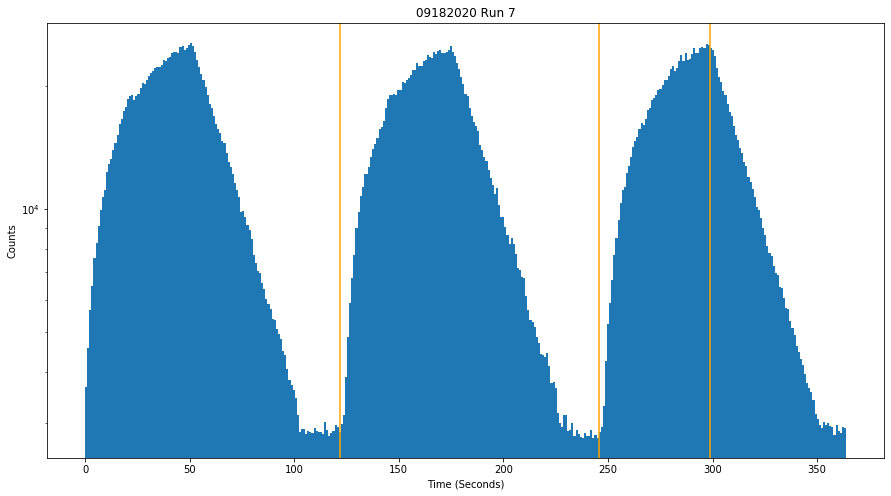

In [10]:
i = 7
run_name = 'runTEST09182020_{}'.format(i)
data = Run_Data(run_name)
BinNum = int(data[0]['TIMETAG'].max()*10**-12) # Setting the number of bins = time of run in seconds.

plt.figure(figsize=(15,8))
plt.tight_layout()
plt.title('09182020 Run {}'.format(i))
plt.ylabel('Counts')
plt.xlabel('Time (Seconds)')
plt.yscale('log')
xcoords = data[1]['TIMETAG']*10**-12
for xc in xcoords:
    plt.axvline(x=xc,color='orange')
y, x, _ = plt.hist(data[0]['TIMETAG']*10**-12,bins=BinNum);
print("Max Rate of Run {}: ".format(i), y.max()*10**-3," kHz")

## Run 9: 

Run Parameters: 

* Beam @ 230 nA
* Gas Flow: 1.8
* Gas Pressure: 30 PSIG

**Max Rate of Run 9:  32.281  kHz**

Max Rate of Run 9:  32.281  kHz


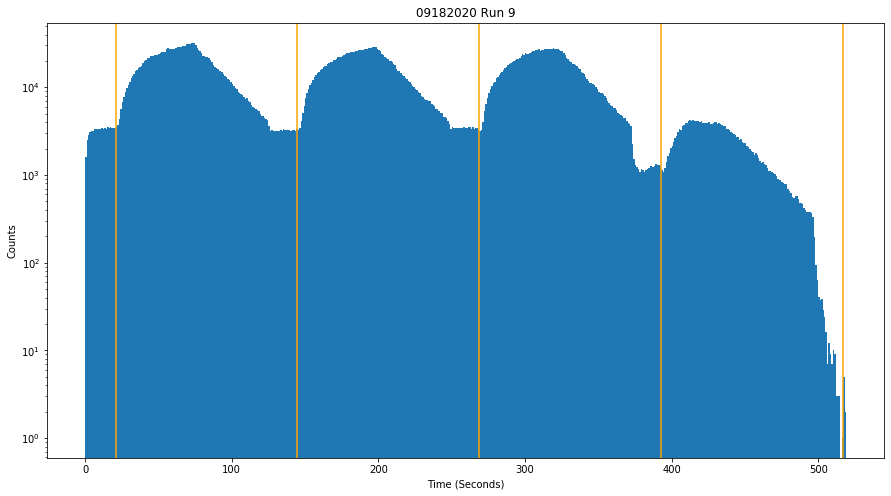

In [11]:
i = 9
run_name = 'runTEST09182020_{}'.format(i)
data = Run_Data(run_name)
BinNum = int(data[0]['TIMETAG'].max()*10**-12) # Setting the number of bins = time of run in seconds.

plt.figure(figsize=(15,8))
plt.tight_layout()
plt.title('09182020 Run {}'.format(i))
plt.ylabel('Counts')
plt.xlabel('Time (Seconds)')
plt.yscale('log')
xcoords = data[1]['TIMETAG']*10**-12
for xc in xcoords:
    plt.axvline(x=xc,color='orange')
y, x, _ = plt.hist(data[0]['TIMETAG']*10**-12,bins=BinNum);
print("Max Rate of Run {}: ".format(i), y.max()*10**-3," kHz")

# Deadtime:

* When fitting Run 2 cycles 0-2 (inclusive) to a simple exponential you get t_1/2 = 16.98 s. 
    * Can't currently understand how Michael is calculating this uncertainty. 
    * Residuals look slightly different across cycles but generally good. 
* When fitting to a deadtime the fitting fails. Not sure why. Perhaps too small for the code to handle it? 

**Addtional Thoughts** 
 
* Should we look at the analog signal?  
    * Yes, we should try to digitize the analogue signal. Start with only 1 of them. There is a cable already set up going from the electronics rack toward the digitizer. Rey had figured out, it seemed, how to use the logic concidence signal we have now as a trigger and to digitize the analogue signal every time we get a trigger.
* How can we use this to investigate deadtime issues? 
    * The idea is to look and see if there is any gain shift or pileup effect versus time (rate). We should plug the analogue signal into Ch0, the coincidence signal should go into a channel labelled "trigger", and we have to figure out how to run the software so it digitizes only when we tell it there is a coincidence. Once this is working we can look at: 1) pulse shape versus rate; 2) mean pulse amplitude versus rate. Both of these can generate distortions versus rate.
* Can you just plug it into ch1, or does it create too much data if it's not being triggered by ch0? 
    * Too much data. The coincidence rate is much lower.

# Going Forward: 

* What is the cycle structure we want to take high quality data with? 
    * Since our Beam off background is so small why not take many halflives of data each cycle? Maybe 15*17 = 255 s of decay per cycle?
* Related to above question: What intial count rate should we shoot for? 30 kHz?
* How many cycles do we need for a good measurement? 
    * What uncertainty would we be aiming for? What would be competitive? I need to do more work to figure this out. 


# Overview of 9/30/20 Meeting

* The background for Run 2 is too high to expect a quality fit for either a pure exponential or a deadtime model. 
* Next time be sure to do a run like Run 2 but with beam cycling in order to investigate deadtime in software. 
* We should redefine the beam cycles such that Beam ON -> t=0. 
* We should investigate ways to further minimize background. 
    * Look at background when you close the manual valve after the turbo. If this reduces background we should think about moving the roughing valve to that location and finding a replacement for the roughing valve. 
    * Try to increase lead shielding. Thicker and more of it. There was discussion of making a lead castle around the detectors.
    * Be sure there isn't background Ne-19 events from the exhaust of the roughing pump. Could test this by disconnecting the long hose and seeing if the background increases, then closing the end of the long hose as well to see if that is different than the long hose just open. 
    

# Plots of all Runs for Reference 

**Posted in Shared Drive**

0
1
2


KeyboardInterrupt: 

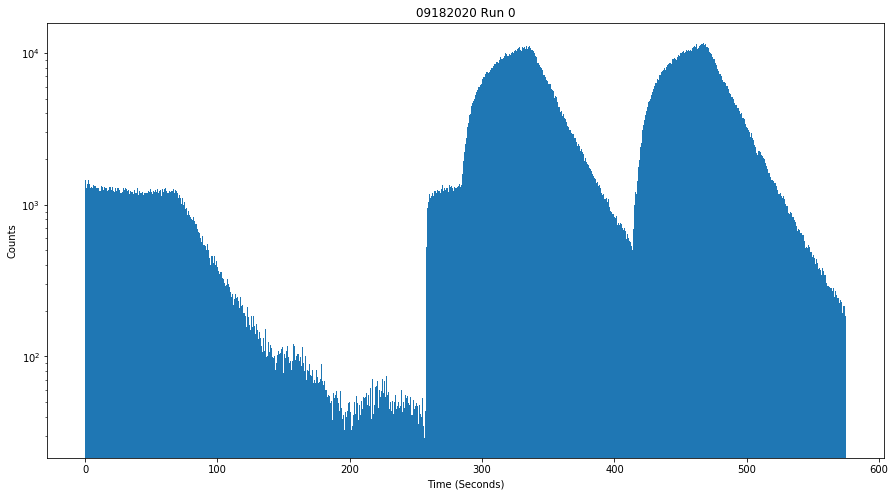

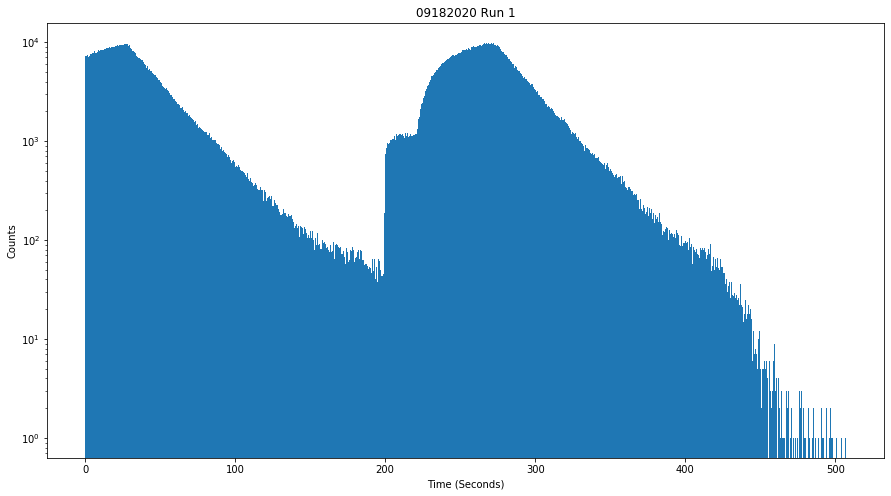

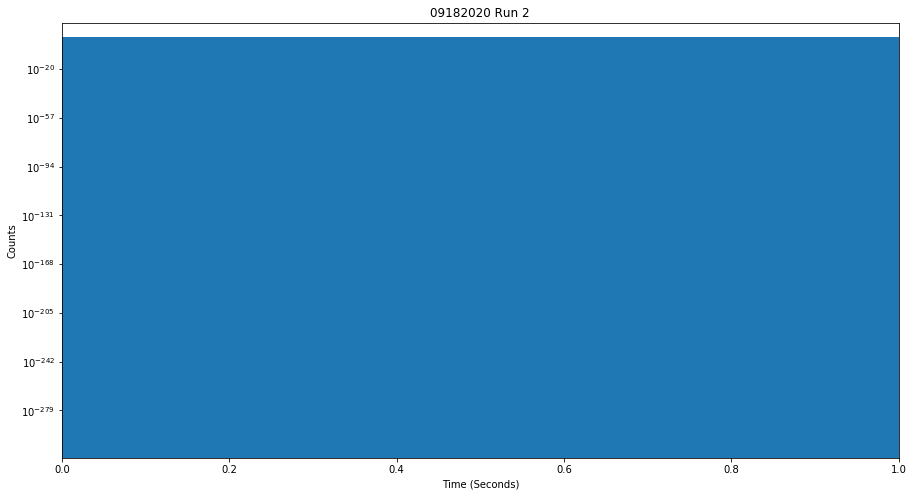

In [12]:
for i in range(10):
    if i==8: continue 
    print(i)
    run_name = 'runTEST09182020_{}'.format(i)
    data = Run_Data(run_name)

    plt.figure(figsize=(15,8))
    plt.tight_layout()
    plt.title('09182020 Run {}'.format(i))
    plt.ylabel('Counts')
    plt.xlabel('Time (Seconds)')
    plt.yscale('log')
    plt.hist(data[0]['TIMETAG']*10**-12,bins=1865);
    plt.savefig('09182020 Run {}'.format(i))

# Investigating the Energy Spectrum of the Ch0 signal

Questions: 

* Why is the enery spectrum we see not a delta peak? 
* Is the energy the amplitude or area of the pulse?
* What is ENERGYSHORT?

In [19]:
#This creates a dataframe for each channel

def create_stringB(location):
#     path0 = '/home/drew/He6CRES/Neon-19/Data/SampleData_Michael/CH0@DT5725_1146_Data_{0:s}.csv'.format(location)
#     path2 = '/home/drew/He6CRES/Neon-19/Data/SampleData_Michael/CH2@DT5725_1146_Data_{0:s}.csv'.format(location)
    
    path0 = '/home/drew/He6CRES/Neon-19/Data/EnergySpectrum_100820/CH0@DT5725_1146_Data_{0:s}.csv'.format(location)
    path2 = '/home/drew/He6CRES/Neon-19/Data/EnergySpectrum_100820/CH2@DT5725_1146_Data_{0:s}.csv'.format(location)
    
    path = [path0,path2]
    return path

def Run_DataB(run_folder_name):
    return[pd.read_csv(create_stringB(run_name)[i],sep=';') for i in range(2)]

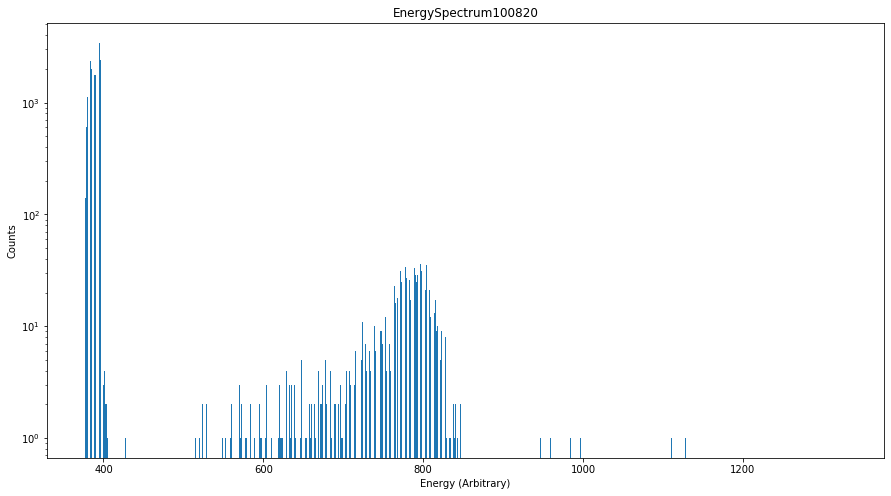

In [32]:
run_name = 'EnergySpectrum100820'
data = Run_DataB(run_name)
BinNum = int(data[0]['ENERGY'].max())

plt.figure(figsize=(15,8))
plt.tight_layout()
plt.title('EnergySpectrum100820')
plt.ylabel('Counts')
plt.xlabel('Energy (Arbitrary)')
plt.yscale('log')
plt.hist(data[0]['ENERGY'],bins=1865);
plt.savefig('09182020 Run {}'.format(i))

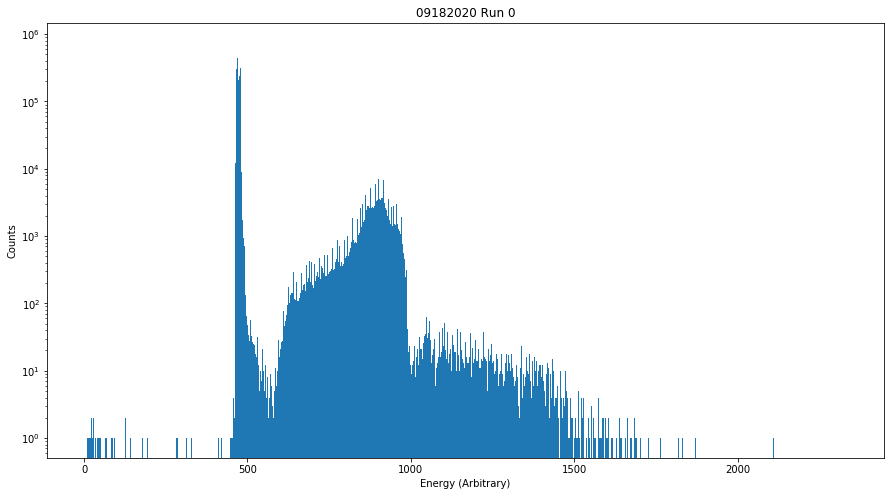

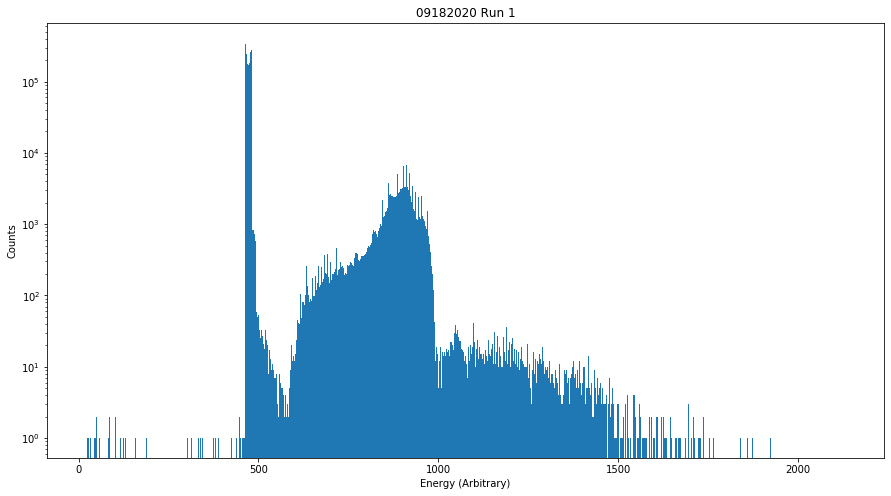

In [33]:
for i in range(2):    
    run_name = 'runTEST09182020_{}'.format(i)
    data = Run_DataA(run_name)
    BinNum = int(data[0]['TIMETAG'].max()*10**-12) # Setting the number of bins = time of run in seconds. 
    plt.figure(figsize=(15,8))
    plt.tight_layout()
    plt.title('09182020 Run {}'.format(i))
    plt.ylabel('Counts')
    plt.xlabel('Energy (Arbitrary)')
    plt.yscale('log')
    y, x, _ = plt.hist(data[0]['ENERGY'],bins=1865);
    